In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


- Looks like all the features have object datatype but can be converted into integer just by removing all the string fields fron each column.

## Data Cleaning

In [6]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [7]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [8]:
# column which has null value

df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Inference
- the dataset is divided into two regions from 122 th column.
- so we can add new column as region to it.

 **1 : "Bejaia Region Dataset"**
 
 **2 : "Sidi-Bel Abbes Region Dataset"** 

In [9]:
# adding new column to dataset with values.
df.loc[:122, 'Region']=1
df.loc[122:, 'Region']=2
df['Region'] = df['Region'].astype(int)

In [10]:
df = df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [12]:
df = df.drop(122).reset_index(drop=True)
df.shape

(243, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

- looking that we are misspaced so we can fix it with str.strip().

In [15]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
## convert object to integer datatype.
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [17]:
## convert object to float datatype.
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

#### Cheacking the number of unique values in each column

In [18]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          8
Region           2
dtype: int64

In [19]:
df['month'].value_counts()

month
8    62
7    61
6    60
9    60
Name: count, dtype: int64

In [20]:
df['year'].value_counts()

year
2012    243
Name: count, dtype: int64

### Inference 
- this dataset contain data between (06/2012) to (09/2012).

In [21]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

- find that we got misspaced so we can fix it with str.strip() method.

In [22]:
df.Classes = df.Classes.str.strip()

In [23]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [24]:
# checking statical data.

df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


### Inference
- highest temperature is 42 and minimum is 22 whereas moderate temperature is about 32.15.
- deviation of temperature is 3.6.
- most of the temperature lies between 30 to 35.

In [25]:
numerical_feature = [feat for feat in df.columns if df[feat].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [26]:
numerical_feature

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [27]:
categorical_feature

['Classes']

In [28]:
# Bejaia Region Dataset
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [29]:
# Sidi-Bel Abbes Region Dataset
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


### Inference
- there is only one categorical feature i.e only one row contain string dataype items.
- all the remaining feature are integer type.

In [30]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index = False)

## Now Explore Visualization

In [31]:
categorical_feature

['Classes']

In [32]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [33]:
# Encoding categorical data into numeriical data by Lable Encodinfrom
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()

In [35]:
enco = encoder.fit_transform(df['Classes'])

In [36]:
df['Encoded_classes'] = np.where(df['Classes'] == 'not fire' ,0, 1)

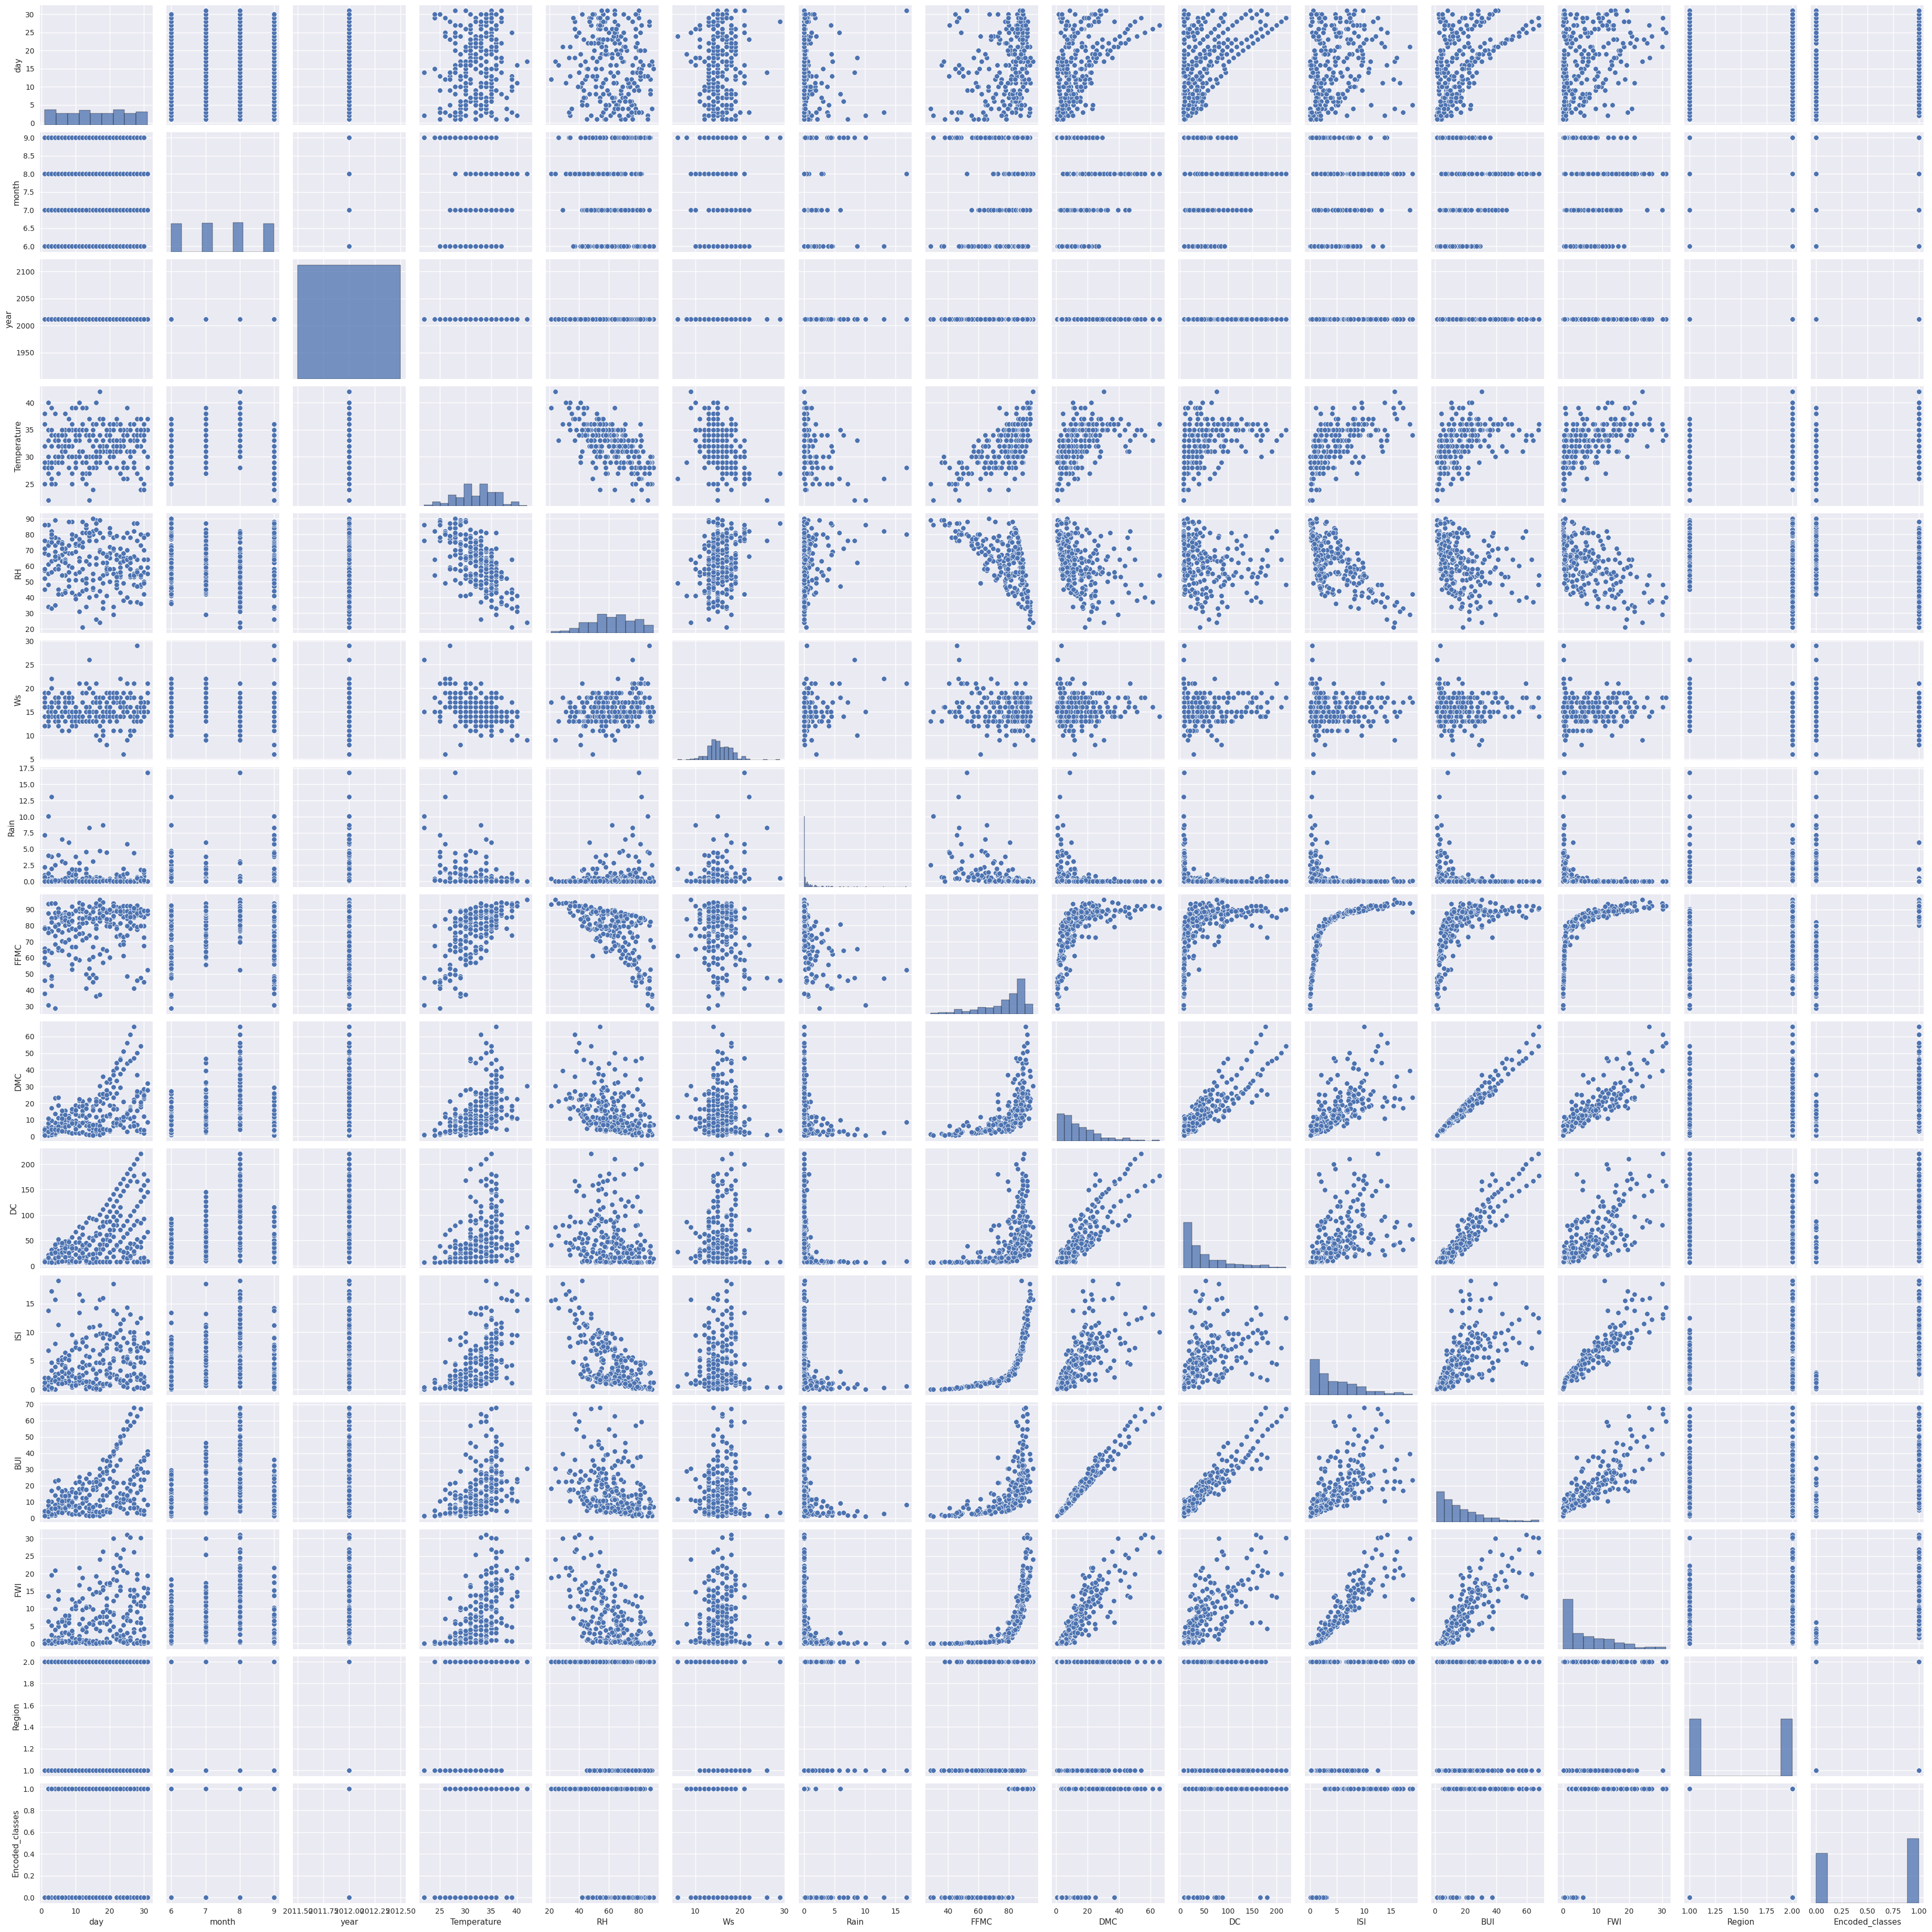

In [125]:
sns.pairplot(df)

In [38]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Encoded_classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,0


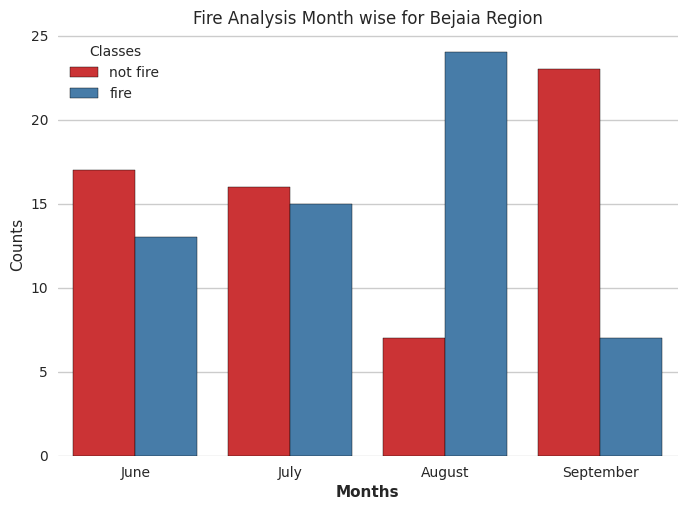

In [203]:
# plt.bar(df['month'], df['Temperature'])
dftemp= df.loc[df['Region']== 1]
sns.countplot(x='month',hue='Classes', data=dftemp, ec = 'black', palette='Set1')
plt.xlabel('Months', weight='bold')
plt.ylabel('Counts')
plt.title('Fire Analysis Month wise for Bejaia Region')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
# plt.grid(alpha = 0.5,axis = 'y')
plt.show()


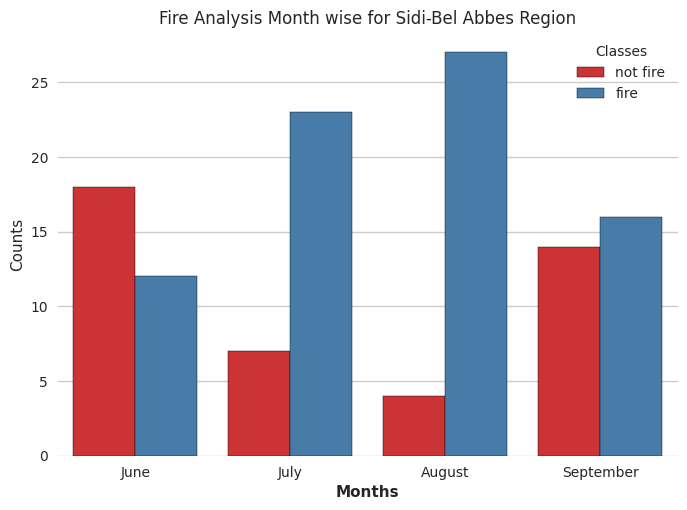

In [208]:
dftemp= df.loc[df['Region']== 2]
sns.countplot(x='month',hue='Classes', data=dftemp, ec = 'black', palette='Set1')
plt.xlabel('Months', weight='bold')
plt.ylabel('Counts')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region')
plt.xticks(np.arange(4), ['June', 'July', 'August', 'September'])
plt.show()

In [230]:
def barchart(feature,xlabel):
      
    by_feature =  df.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

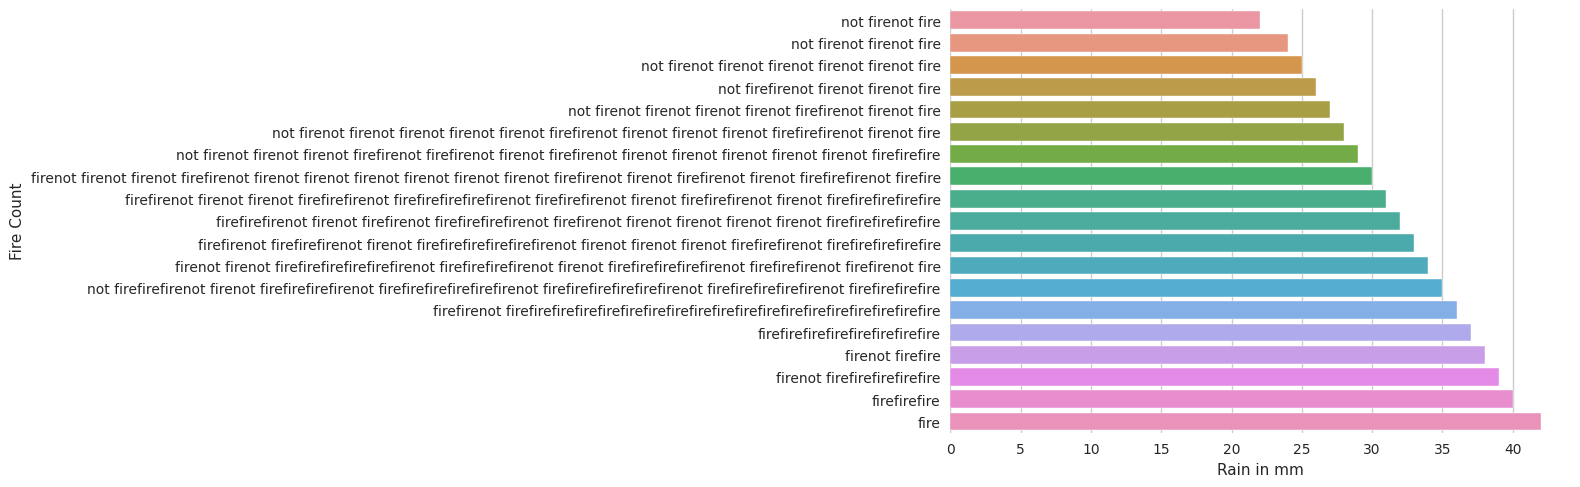

In [231]:
barchart('Temperature', 'Rain in mm')

In [219]:
by_feature = df.groupby(['Temperature'], as_index=False)['Classes'].sum()
by_feature[['Temperature','Classes']]

,Temperature,Classes
0,22,not firenot fire
1,24,not firenot firenot fire
2,25,not firenot firenot firenot firenot firenot fire
3,26,not firefirenot firenot firenot fire
4,27,not firenot firenot firenot firenot firefireno...
5,28,not firenot firenot firenot firenot firenot fi...
6,29,not firenot firenot firenot firefirenot firefi...
7,30,firenot firenot firenot firefirenot firenot fi...
8,31,firefirenot firenot firenot firefirefirenot fi...
9,32,firefirefirenot firenot firefirenot firefirefi...


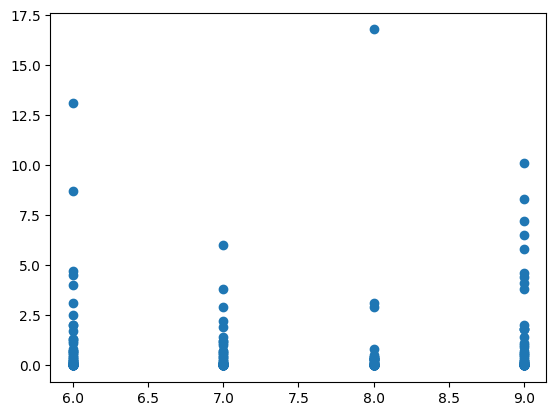

In [48]:
plt.scatter(df['month'], df['Rain'])

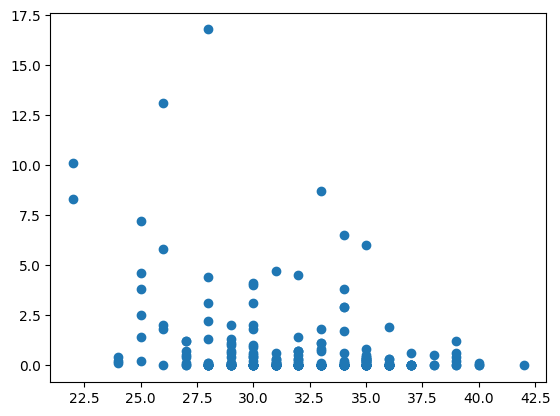

In [61]:
plt.scatter(df['Temperature'], df['Rain'])

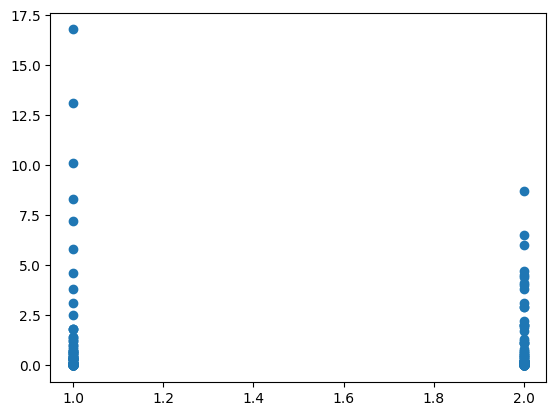

In [62]:
plt.scatter(df['Region'], df['Rain'])

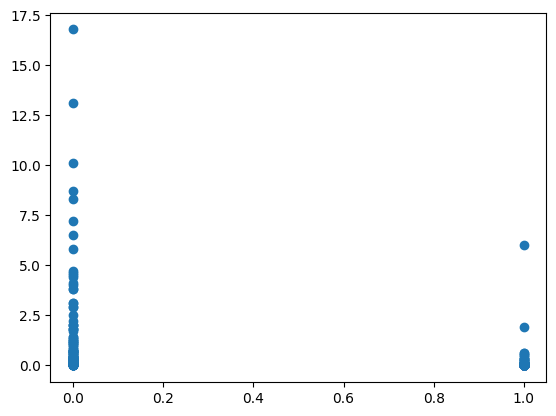

In [63]:
plt.scatter(df['Encoded_classes'], df['Rain'])

In [210]:
# dropping day, month, year from dataset
df1 = df.drop(['day', 'month', 'year'], axis=1)

In [55]:
# check counts.
df.Encoded_classes.value_counts()

Encoded_classes
1    137
0    106
Name: count, dtype: int64

/tmp/ipykernel_356/1359083058.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


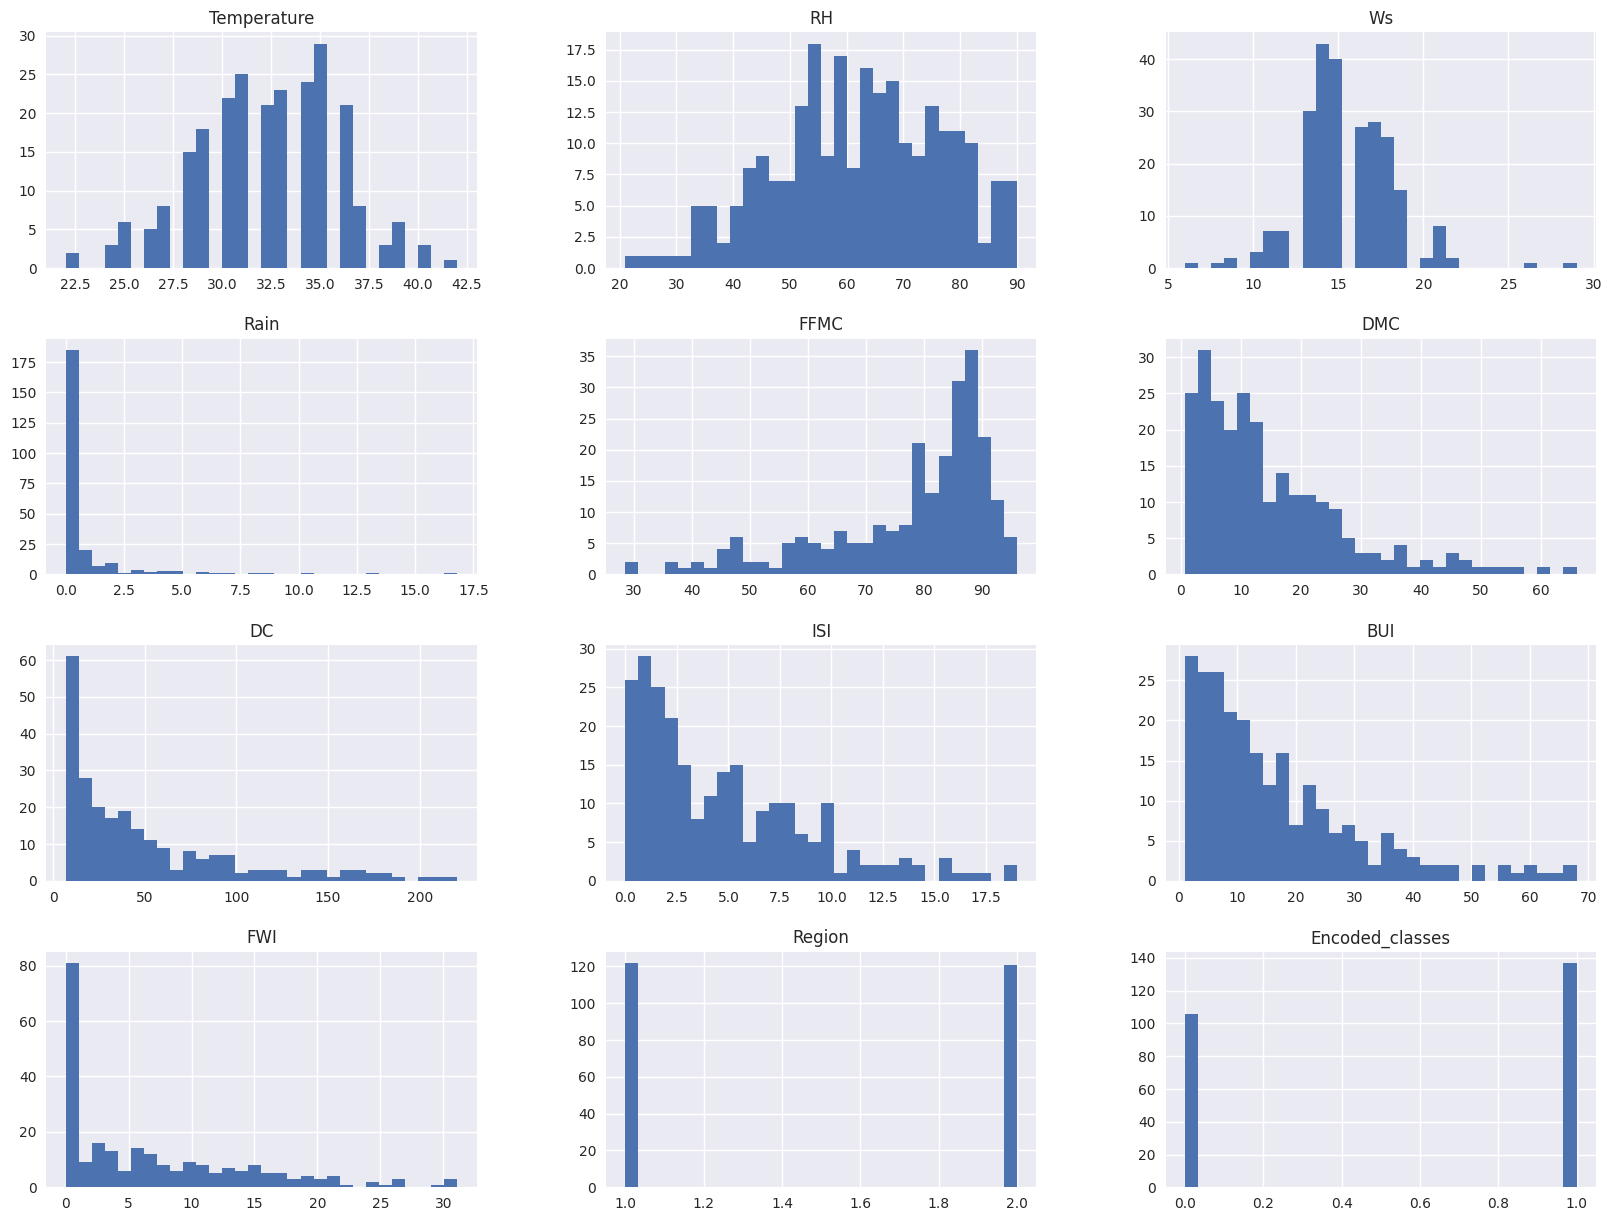

In [72]:
# plot density feature for all feature

plt.style.use('seaborn')
df1.hist(bins=30, figsize=(20,15))
plt.show()

In [118]:
x = df.Encoded_classes.value_counts(normalize=True)
pieLable = ['Fire', 'Not Fire']

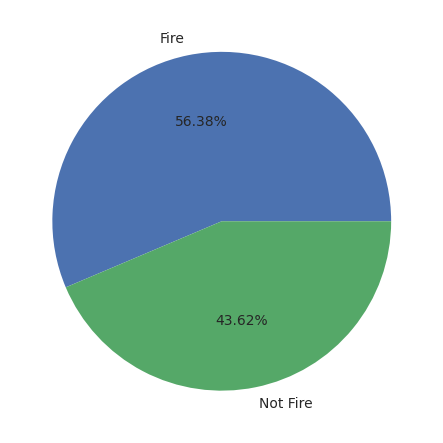

In [122]:
# plt.figure(figsize =(12, 7))
plt.pie(x, labels=pieLable, autopct='%1.2f%%')
plt.show()

<Axes: >

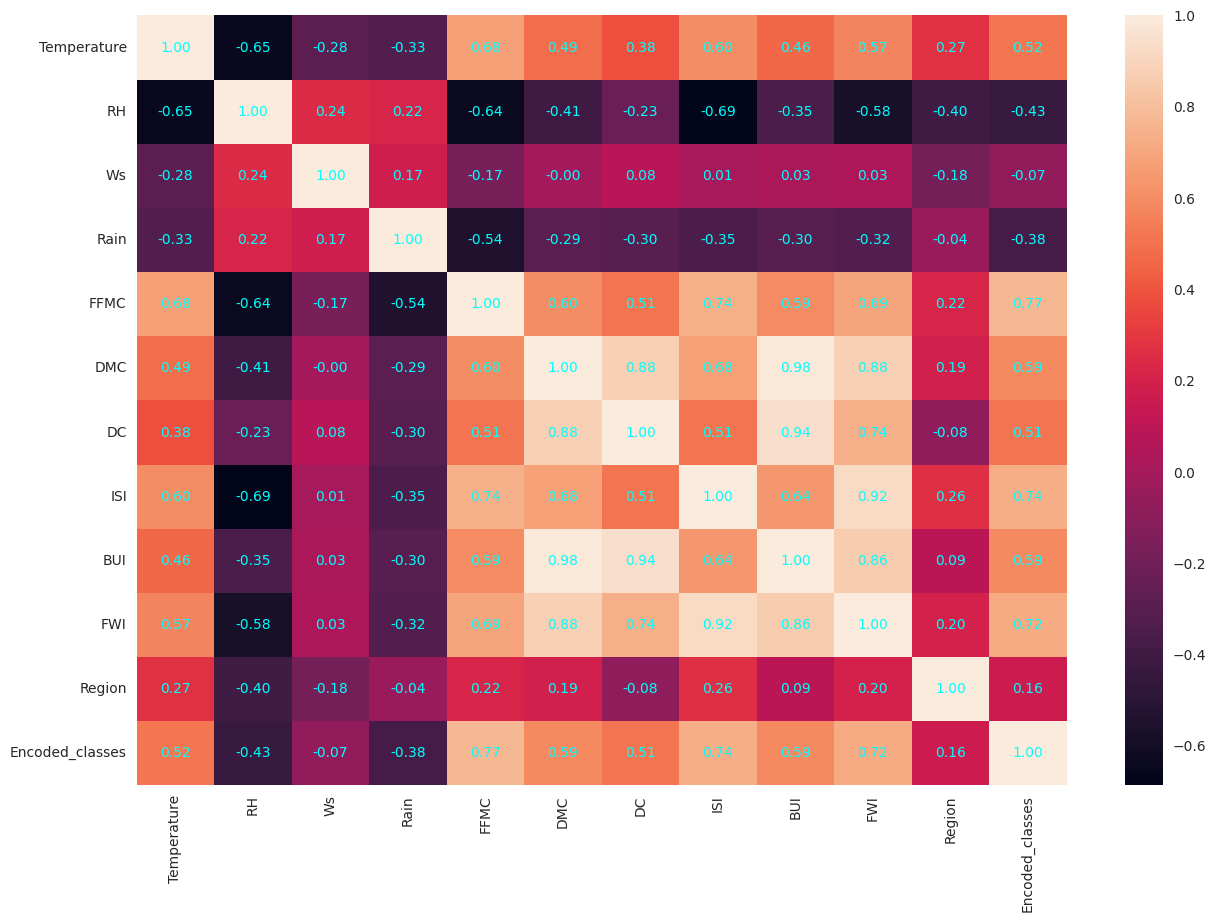

In [171]:
# correlation charts
df2 = df1.drop(['Classes'], axis=1)
plt.subplots(figsize=(15,10))
# cm = np.corrcoef(df2.corr().values.T)
sns.heatmap(df2.corr(), annot=True, annot_kws={'color':'cyan'},fmt='.2f')

In [159]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Encoded_classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,0
